In [1]:
#!/usr/bin/python3

#import pypyodbc
#import urllib
import urllib.request as urllib
import requests
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import mplfinance as mpf
#import matplotlib.dates as mpdates


url="https://www.alphavantage.co/query?function=FX_INTRADAY&from_symbol=GBP&to_symbol=USD&interval=1min&outputsize=full&apikey=BQNX49EZGZKYUACF&datatype=csv"
response = requests.get(url)


In [2]:
type(response.content)


bytes

In [3]:
from io import BytesIO

df = pd.read_csv(BytesIO(response.content))
df_for_graph=df

In [4]:
df
df=df.assign(Currency= "GBPUSD")
df
df=df.assign(TimeFrame= "1Min")
df


,timestamp,open,high,low,close,Currency,TimeFrame
0,2022-11-03 07:52:00,1.13361,1.13379,1.13299,1.13318,GBPUSD,1Min
1,2022-11-03 07:51:00,1.13389,1.13389,1.13320,1.13361,GBPUSD,1Min
2,2022-11-03 07:50:00,1.13355,1.13404,1.13325,1.13389,GBPUSD,1Min
3,2022-11-03 07:49:00,1.13340,1.13374,1.13313,1.13355,GBPUSD,1Min
4,2022-11-03 07:48:00,1.13338,1.13364,1.13310,1.13362,GBPUSD,1Min
...,...,...,...,...,...,...,...
1435,2022-11-02 07:57:00,1.14921,1.14958,1.14892,1.14933,GBPUSD,1Min
1436,2022-11-02 07:56:00,1.14945,1.14952,1.14887,1.14921,GBPUSD,1Min
1437,2022-11-02 07:55:00,1.14923,1.14955,1.14875,1.14948,GBPUSD,1Min
1438,2022-11-02 07:54:00,1.14986,1.14996,1.14897,1.14927,GBPUSD,1Min


In [5]:
type(response.headers)

requests.structures.CaseInsensitiveDict

In [6]:
type(response)

requests.models.Response

In [7]:
response.headers

{'Date': 'Thu, 03 Nov 2022 07:53:09 GMT', 'Content-Type': 'application/x-download', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Content-Disposition': 'attachment; filename=fx_intraday_1min_GBP_USD.csv', 'Allow': 'GET, HEAD, OPTIONS', 'X-Frame-Options': 'SAMEORIGIN', 'Vary': 'Cookie', 'Via': '1.1 vegur', 'CF-Cache-Status': 'DYNAMIC', 'Server-Timing': 'cf-q-config;dur=6.0000020312145e-06', 'Server': 'cloudflare', 'CF-RAY': '764388da19ad1967-EWR'}

In [8]:
df[['Date', 'Time']] = df['timestamp'].str.split(' ', expand=True)

In [9]:
df.head()

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
0,2022-11-03 07:52:00,1.13361,1.13379,1.13299,1.13318,GBPUSD,1Min,2022-11-03,07:52:00
1,2022-11-03 07:51:00,1.13389,1.13389,1.13320,1.13361,GBPUSD,1Min,2022-11-03,07:51:00
2,2022-11-03 07:50:00,1.13355,1.13404,1.13325,1.13389,GBPUSD,1Min,2022-11-03,07:50:00
3,2022-11-03 07:49:00,1.13340,1.13374,1.13313,1.13355,GBPUSD,1Min,2022-11-03,07:49:00
4,2022-11-03 07:48:00,1.13338,1.13364,1.13310,1.13362,GBPUSD,1Min,2022-11-03,07:48:00


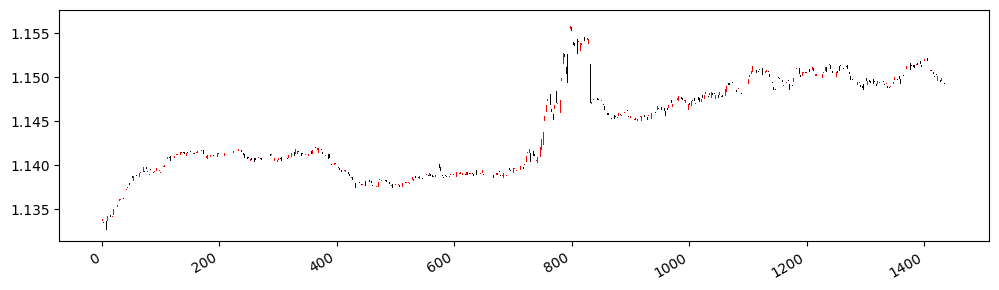

In [14]:
#plt.figure()
fig= plt.figure(figsize=(12,3))
# "up" dataframe will store the df
# when the closing stock price is greater
# than or equal to the opening stock prices
up = df[df.close > df.open]

# "down" dataframe will store the df
# when the closing stock price is
# lesser than the opening stock prices
down = df[df.close < df.open]

# When the stock prices have decreased, then it
# will be represented by blue color candlestick
col1 = 'black'

# When the stock prices have increased, then it
# will be represented by green color candlestick
col2 = 'red'

# Setting width of candlestick elements
#width = .3
#width2 = .03
width = .6
width2 = .06

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')

# displaying candlestick chart of stock data
# of a week
plt.plot()
plt.savefig('1min.png')
plt.show()


In [18]:
df.shape[0]

1440

In [24]:
df2=df[725:800]

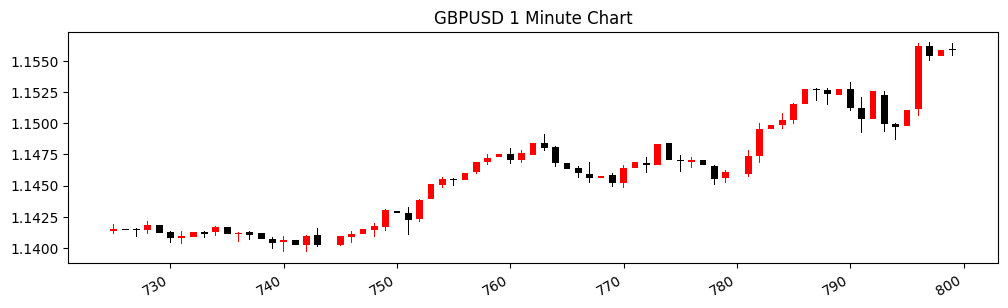

In [26]:
#plt.figure()
fig= plt.figure(figsize=(12,3))
# "up" dataframe will store the df
# when the closing stock price is greater
# than or equal to the opening stock prices
up = df2[df2.close >= df2.open]

# "down" dataframe will store the df
# when the closing stock price is
# lesser than the opening stock prices
down = df2[df2.close < df2.open]

# When the stock prices have decreased, then it
# will be represented by blue color candlestick
col1 = 'black'

# When the stock prices have increased, then it
# will be represented by green color candlestick
col2 = 'red'

# Setting width of candlestick elements
#width = .3
#width2 = .03
width = .6
width2 = .06

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')

# displaying candlestick chart of stock data
# of a week
plt.title("GBPUSD 1 Minute Chart")
plt.plot()
plt.savefig('1min-2.png')
plt.show()

In [29]:
df2[740:750]


,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time


In [30]:
df[740:750]

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time
740,2022-11-02 19:32:00,1.14062,1.14093,1.13964,1.14049,GBPUSD,1Min,2022-11-02,19:32:00
741,2022-11-02 19:31:00,1.14023,1.14079,1.13992,1.14063,GBPUSD,1Min,2022-11-02,19:31:00
742,2022-11-02 19:30:00,1.14097,1.14103,1.13965,1.14022,GBPUSD,1Min,2022-11-02,19:30:00
743,2022-11-02 19:29:00,1.14023,1.14162,1.14009,1.14101,GBPUSD,1Min,2022-11-02,19:29:00
744,2022-11-02 19:28:00,1.14023,1.14064,1.13962,1.14020,GBPUSD,1Min,2022-11-02,19:28:00
745,2022-11-02 19:27:00,1.14091,1.14091,1.14013,1.14023,GBPUSD,1Min,2022-11-02,19:27:00
746,2022-11-02 19:26:00,1.14108,1.14131,1.14042,1.14083,GBPUSD,1Min,2022-11-02,19:26:00
747,2022-11-02 19:25:00,1.14148,1.14208,1.14090,1.14111,GBPUSD,1Min,2022-11-02,19:25:00
748,2022-11-02 19:24:00,1.14177,1.14196,1.14083,1.14145,GBPUSD,1Min,2022-11-02,19:24:00
749,2022-11-02 19:23:00,1.14300,1.14309,1.14137,1.14168,GBPUSD,1Min,2022-11-02,19:23:00


In [31]:
df3=df


In [32]:
df3['TimeDeta'] = pd.to_timedelta(df3['Time'])
### Convert 'timeColumn' to minutes only.
df3['Day_Time_Index'] = df3['TimeDeta'].dt.total_seconds() / 60

In [34]:
df3.head(10)

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time,TimeDeta,Day_Time_Index
0,2022-11-03 07:52:00,1.13361,1.13379,1.13299,1.13318,GBPUSD,1Min,2022-11-03,07:52:00,0 days 07:52:00,472.0
1,2022-11-03 07:51:00,1.13389,1.13389,1.13320,1.13361,GBPUSD,1Min,2022-11-03,07:51:00,0 days 07:51:00,471.0
2,2022-11-03 07:50:00,1.13355,1.13404,1.13325,1.13389,GBPUSD,1Min,2022-11-03,07:50:00,0 days 07:50:00,470.0
3,2022-11-03 07:49:00,1.13340,1.13374,1.13313,1.13355,GBPUSD,1Min,2022-11-03,07:49:00,0 days 07:49:00,469.0
4,2022-11-03 07:48:00,1.13338,1.13364,1.13310,1.13362,GBPUSD,1Min,2022-11-03,07:48:00,0 days 07:48:00,468.0
5,2022-11-03 07:47:00,1.13352,1.13364,1.13303,1.13337,GBPUSD,1Min,2022-11-03,07:47:00,0 days 07:47:00,467.0
6,2022-11-03 07:46:00,1.13381,1.13384,1.13332,1.13354,GBPUSD,1Min,2022-11-03,07:46:00,0 days 07:46:00,466.0
7,2022-11-03 07:45:00,1.13337,1.13392,1.13309,1.13379,GBPUSD,1Min,2022-11-03,07:45:00,0 days 07:45:00,465.0
8,2022-11-03 07:44:00,1.13310,1.13364,1.13262,1.13338,GBPUSD,1Min,2022-11-03,07:44:00,0 days 07:44:00,464.0
9,2022-11-03 07:43:00,1.13370,1.13371,1.13291,1.13321,GBPUSD,1Min,2022-11-03,07:43:00,0 days 07:43:00,463.0


In [35]:
df3.tail(10)

,timestamp,open,high,low,close,Currency,TimeFrame,Date,Time,TimeDeta,Day_Time_Index
1430,2022-11-02 08:02:00,1.14996,1.15006,1.14928,1.14957,GBPUSD,1Min,2022-11-02,08:02:00,0 days 08:02:00,482.0
1431,2022-11-02 08:01:00,1.14981,1.15018,1.14920,1.14997,GBPUSD,1Min,2022-11-02,08:01:00,0 days 08:01:00,481.0
1432,2022-11-02 08:00:00,1.14935,1.15009,1.14919,1.14982,GBPUSD,1Min,2022-11-02,08:00:00,0 days 08:00:00,480.0
1433,2022-11-02 07:59:00,1.14935,1.14948,1.14896,1.14937,GBPUSD,1Min,2022-11-02,07:59:00,0 days 07:59:00,479.0
1434,2022-11-02 07:58:00,1.14930,1.14958,1.14890,1.14935,GBPUSD,1Min,2022-11-02,07:58:00,0 days 07:58:00,478.0
1435,2022-11-02 07:57:00,1.14921,1.14958,1.14892,1.14933,GBPUSD,1Min,2022-11-02,07:57:00,0 days 07:57:00,477.0
1436,2022-11-02 07:56:00,1.14945,1.14952,1.14887,1.14921,GBPUSD,1Min,2022-11-02,07:56:00,0 days 07:56:00,476.0
1437,2022-11-02 07:55:00,1.14923,1.14955,1.14875,1.14948,GBPUSD,1Min,2022-11-02,07:55:00,0 days 07:55:00,475.0
1438,2022-11-02 07:54:00,1.14986,1.14996,1.14897,1.14927,GBPUSD,1Min,2022-11-02,07:54:00,0 days 07:54:00,474.0
1439,2022-11-02 07:53:00,1.14977,1.14996,1.14931,1.14989,GBPUSD,1Min,2022-11-02,07:53:00,0 days 07:53:00,473.0


In [36]:
file_df = open('GBPUSD_1MIN_DF', 'wb')
file_df2 = open('GBPUSD_1MIN_DF2', 'wb')
file_df3 = open('GBPUSD_1MIN_DF3', 'wb')
# dump information to that file
pickle.dump(df, file_df)
pickle.dump(df2, file_df2)
pickle.dump(df3, file_df3)

In [39]:
file_df.close()
file_df2.close()
file_df3.close()


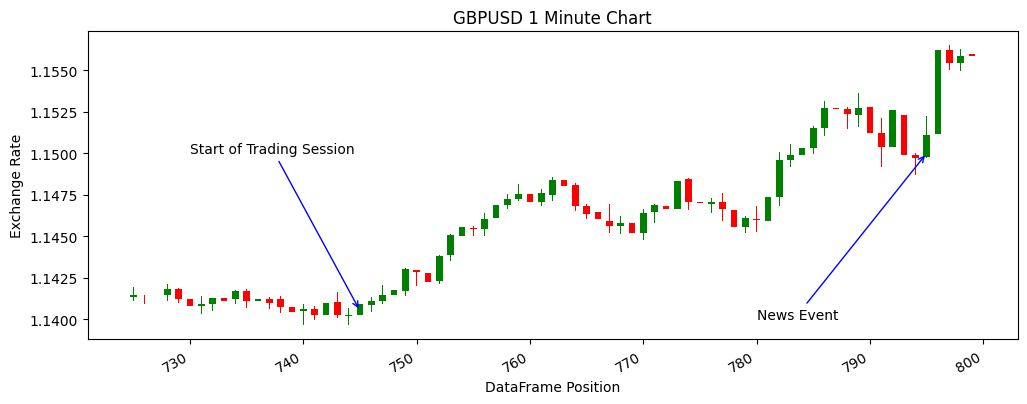

In [61]:
#plt.figure()
fig= plt.figure(figsize=(12,4))

up = df2[df2.close >= df2.open]
down = df2[df2.close < df2.open]

col1 = 'red'
col2 = 'green'

# Setting width of candlestick elements
#width = .3
#width2 = .03
width = .6
width2 = .06

# Plotting up prices of the stock
plt.bar(up.index, up.close-up.open, width, bottom=up.open, color=col1)
plt.bar(up.index, up.high-up.close, width2, bottom=up.close, color=col1)
plt.bar(up.index, up.low-up.open, width2, bottom=up.open, color=col1)

# Plotting down prices of the stock
plt.bar(down.index, down.close-down.open, width, bottom=down.open, color=col2)
plt.bar(down.index, down.high-down.open, width2, bottom=down.open, color=col2)
plt.bar(down.index, down.low-down.close, width2, bottom=down.close, color=col2)

# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')

# displaying candlestick chart of stock data
# of a week
plt.title("GBPUSD 1 Minute Chart")
plt.xlabel('DataFrame Position')
plt.ylabel('Exchange Rate')
plt.annotate("Start of Trading Session", xy=(745, 1.1405), xytext=(730, 1.15), arrowprops={"arrowstyle":"->", "color":"blue"})
plt.annotate("News Event", xy=(795, 1.15), xytext=(780, 1.14), arrowprops={"arrowstyle":"->", "color":"blue"})
plt.plot()
plt.savefig('1min-2.png')
plt.show()